# Importing Libraries

In [77]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Link: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

# Image Preprocessing

In [80]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


# Loading Model

In [81]:
cnn = tf.keras.models.load_model('trained_model_fruit_Veg.h5')

#Visualising and Performing Prediction on Single image

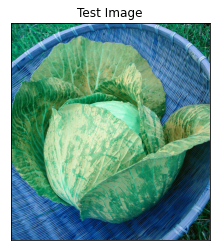

In [119]:
import cv2
image_path = '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test/cabbage/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [120]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 22ms/step


In [121]:
#test_set.class_names
print(predictions)

[[1.9986727e-19 4.8397811e-15 4.4699741e-15 1.7016145e-15 9.9999952e-01
  2.1935856e-22 7.6099760e-12 8.5189464e-09 5.7269630e-15 1.4441638e-11
  2.5054627e-08 2.0879196e-21 4.3393447e-15 2.4563071e-10 1.0455387e-15
  7.0714201e-16 7.3344537e-13 1.0273150e-11 3.7029788e-10 7.1865447e-13
  3.7662930e-15 1.5638857e-15 2.5635019e-17 8.5403316e-11 1.1532516e-11
  9.8429338e-12 2.8857593e-21 4.8743941e-14 9.5310175e-13 2.8841193e-10
  9.0966026e-14 4.7822602e-13 6.6941000e-13 2.5982226e-19 4.3183658e-07
  4.4286588e-13]]


In [122]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index)

(array([4]),)


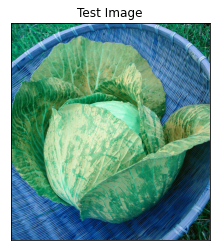

In [123]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [124]:
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a cabbage
